**Trends in COVID-19 Infection and Vaccination Data in Scotland, Disaggregated by Gender, Region, and Urban Density** 

**Written for the Final Exam: Python for Data Science as part of the MSc Data Science, Technology, and Innovation at the Bayes Centre, University of Edinburgh**

**Course taught by Dr. Alex Ramsay & Dr. Douglas Houston**

**April 21st, 2025**

**Dataset**

To complete this project, I created a new, compiled dataset in a workbook called Cleaned Final Exam Data.xlsx. This was pulling the relevant datasets from a variety of sources, so that I could analyze them more easily. The sheets I included with comprehensive data were:

·      New Cases by Day

·      New Deaths by Day

·      New Cases by Region by Day

·      New Cases by Age by Day

·      New Cases Test Type, Hospital,

·      Weekly Admissions by Age

·      Vaccination Totals

·      All Vaccinations

·      Vaccinations by Sex and Age

I added a few sheets with datasets with more limited data, but determined that because of the low sample sizes, it was not very useful for drawing statistically significant insights. 

·      Vaccination by Ethnicity

·      Vaccinations by Ethnicity 2

·      Vaccinations by Area \(Incomplete\)

**Sources**

In addition to the datasets shared via Onedrive on the website [https://www.travellingtabby.com/scotland\-coronavirus\-tracker/](https://www.travellingtabby.com/scotland-coronavirus-tracker/) , I found additional data\-sets at the below sources:

[https://www.opendata.nhs.scot/dataset/flu\-covid\-vaccinations/resource/39c57ad5\-158d\-4405\-80d0\-ca3730b6fd8c](https://www.opendata.nhs.scot/dataset/flu-covid-vaccinations/resource/39c57ad5-158d-4405-80d0-ca3730b6fd8c) \- COVID Vaccines delivered daily

[https://www.opendata.nhs.scot/dataset/flu\-covid\-vaccinations/resource/5536c83b\-8ac9\-4891\-a3e9\-3868f0ff8f73](https://www.opendata.nhs.scot/dataset/flu-covid-vaccinations/resource/5536c83b-8ac9-4891-a3e9-3868f0ff8f73) \- COVID Vaccines by ethnicity

[https://www.opendata.nhs.scot/dataset/flu\-covid\-vaccinations/resource/11b1540b\-4b90\-4ce6\-a556\-b51cfd592f0e](https://www.opendata.nhs.scot/dataset/flu-covid-vaccinations/resource/11b1540b-4b90-4ce6-a556-b51cfd592f0e) \- COVID Vaccines, NHS center \(location\) of delivery

[https://www.opendata.nhs.scot/dataset/flu\-covid\-vaccinations/resource/2231708c\-9cfa\-4b27\-a1ff\-5cc8a45a02c3](https://www.opendata.nhs.scot/dataset/flu-covid-vaccinations/resource/2231708c-9cfa-4b27-a1ff-5cc8a45a02c3) \- COVID Vaccines by ethnicity and status \(frontline worker? Over 50?\)

[https://statistics.gov.scot/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fcoronavirus\-covid\-19\-management\-information](https://statistics.gov.scot/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fcoronavirus-covid-19-management-information) \- COVID Data

[https://statistics.gov.scot/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fdeaths\-involving\-coronavirus\-covid\-19](https://statistics.gov.scot/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fdeaths-involving-coronavirus-covid-19) \- COVID Deaths Data

[https://www.opendata.nhs.scot/dataset/covid\-19\-vaccination\-in\-scotland/resource/db27a16d\-52e1\-45e4\-bd97\-d13831548393](https://www.opendata.nhs.scot/dataset/covid-19-vaccination-in-scotland/resource/db27a16d-52e1-45e4-bd97-d13831548393) \- All Vaccines

[https://www.opendata.nhs.scot/dataset/covid\-19\-vaccination\-in\-scotland/resource/9b99e278\-b8d8\-47df\-8d7a\-a8cf98519ac1\-](https://www.opendata.nhs.scot/dataset/covid-19-vaccination-in-scotland/resource/9b99e278-b8d8-47df-8d7a-a8cf98519ac1-) Vaccines by Age and Sex

**Technology**

In addition, I used [Perplexity.ai](http://Perplexity.ai) and ChatGPT to assist with writing, streamlining, and debugging code, which enabled me to more efficiently carry out analysis and make use of features that were not covered in this course. 

**Project Lay\-Out**

The project will answer the exam questions in order:

1. First, we will evaluate how the # of COVID cases in Scotland changed over time, identifying peaks and correlating them with holidays and re-openings from lockdown.

2. Second, we will evaluate how the \# of vaccinations in Scotland changed over time, noting how this also corresponded with seasons of high travel. 

3. Third, we will explore the correlation between vaccination rate and death rate. At first, the correlation seems weak, close to 0, but when we introduce a time lag, we see that there is an increasingly strong negative correlation between vaccinations and deaths with a greater time lag. In other words, the vaccinations don't immediately impact deaths, but when you project out to 2 weeks, 3 weeks, or 3 months past the vaccination date, you can see a notificeable decline in deaths. This makes sense, given that vaccinations are intended to prevent future infections, but will have no impact on existing ones. 

4. The fourth section will disaggregate the data to observe more trends, including about gender and regional distribution. 

We look at the gendered components of COVID-19, observing that women are overall more likely to be vaccinated than men. This potentially could be tied the fact that many of the fields that required front\-line workers, including the care industries and nursing and medical professions, are female\-dominated. If women were more likely to be exposed to COVID\-19 because of less ability to stay at home, they may have experienced stronger motivations to get vaccinated, which could explain the disparity.

In terms of regionality, the main conclusions are that regional distribution of cases varied, with a positive correlation between population density and number of infections; Scots residing in more rural regions were less likely to be infected. 



In [1]:
# Set up

!pip install openpyxl matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all sheets from the Excel file into a dictionary
file_path = 'Cleaned Final Exam Data.xlsx'  # Adjust path as needed
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Display available sheet names, to see what I'm working with
print(f"Sheets Available: {list(all_sheets)}")

Sheets Available: ['New Cases by Day', 'New Deaths by Day', 'New Cases by Region by Day', 'New Cases by Age by Day', 'New Cases Test Type, Hospital, ', 'Weekly Admissions by Age', 'Vaccination Totals', 'All Vaccinations', 'Vaccinations by Sex and Age', 'Vaccination by Ethnicity', 'Vaccinations by Ethnicity 2', 'Vaccinations by Date', 'Vaccinations by Area (Incomplet']


In [3]:
# Create DataFrame for the "New Cases by Day" sheet
daily_cases_df = all_sheets.get('New Cases by Day')

# Ensure required columns are present
if daily_cases_df is None or not {'Date', 'New Cases'}.issubset(daily_cases_df.columns):
    raise ValueError("Required columns ('Date', 'New Cases') not found in the sheet.")

# Clean data
daily_cases_df['Date'] = pd.to_datetime(daily_cases_df['Date'], errors='coerce')
daily_cases_df['New Cases'] = pd.to_numeric(daily_cases_df['New Cases'], errors='coerce')
daily_cases_df = daily_cases_df.dropna(subset=['Date', 'New Cases'])

# Summary statistics
display(
    daily_cases_df['New Cases']
    .describe()
    .to_frame()
    .style.background_gradient(cmap='Blues')
)

,New Cases
count,1172.000000
mean,1855.174915
std,2983.597695
min,0.000000
25%,262.000000
50%,647.500000
75%,2213.000000
max,23539.000000


In [4]:
# Ensure no missing data in the 'New Cases' column
daily_cases_clean = daily_cases_df.dropna(subset=['New Cases'])

# Calculate and print statistics
mean_cases = daily_cases_clean['New Cases'].mean()
max_cases = daily_cases_clean['New Cases'].max()
date_max_cases = daily_cases_clean.loc[daily_cases_clean['New Cases'].idxmax(), 'Date']

print(f"Mean daily cases: {mean_cases:.2f}")
print(f"Max daily cases: {max_cases}")
print(f"Date with max cases: {date_max_cases.strftime('%Y-%m-%d')}")

Mean daily cases: 1855.17
Max daily cases: 23539
Date with max cases: 2021-12-29


So far, we can see that there was an average of 1855 new cases per day in Scotland. However, the standard deviation was extreme, at 2983 cases, indicating that there was significant variation in the number of cases per day over the time frame from January of 2020 through the end of rigorous data collection in May of 2023. 

The day with the most new cases was December 29th, 2021. 


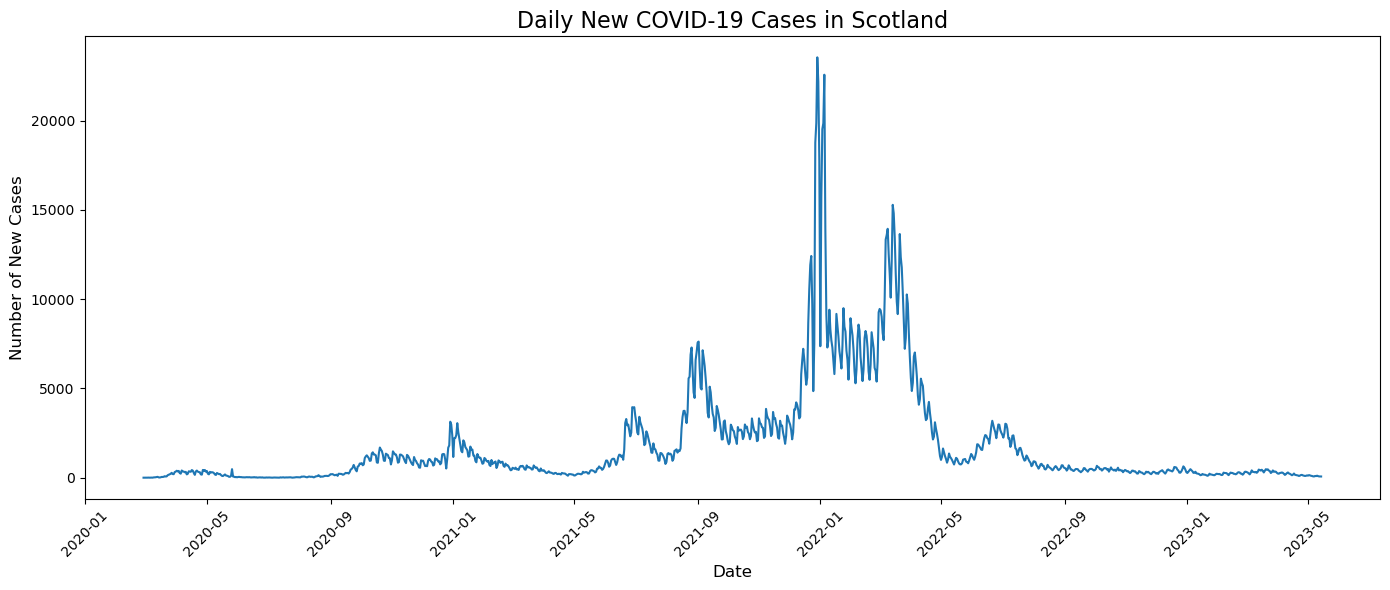

In [5]:
# Function for customizing plot
def customize_plot(title, xlabel, ylabel, xticks_rotation=45):
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=xticks_rotation)
    plt.tight_layout()

# Plotting the data
plt.figure(figsize=(14, 6))

# Use lineplot with fewer default warnings by setting error bar style explicitly
sns.lineplot(data=daily_cases_df, x='Date', y='New Cases', errorbar=None)

# Use the custom function to handle plot customization
customize_plot('Daily New COVID-19 Cases in Scotland', 'Date', 'Number of New Cases')

# Show the plot
plt.show()

In [6]:
# Create a function to roll the averages and smooth my data. 

def calculate_rolling_avg(df, column, window=7, min_periods=1):
    """
    Calculate the rolling average for a specified column in the dataframe.

    Parameters:
    - df: pandas DataFrame
    - column: str, column name for which the rolling average is to be calculated
    - window: int, size of the moving window (default is 7)
    - min_periods: int, minimum number of observations in window to have a value (default is 1)

    Returns:
    - pandas Series: Rolling average of the specified column
    """
    return df[column].rolling(window=window, min_periods=min_periods).mean()

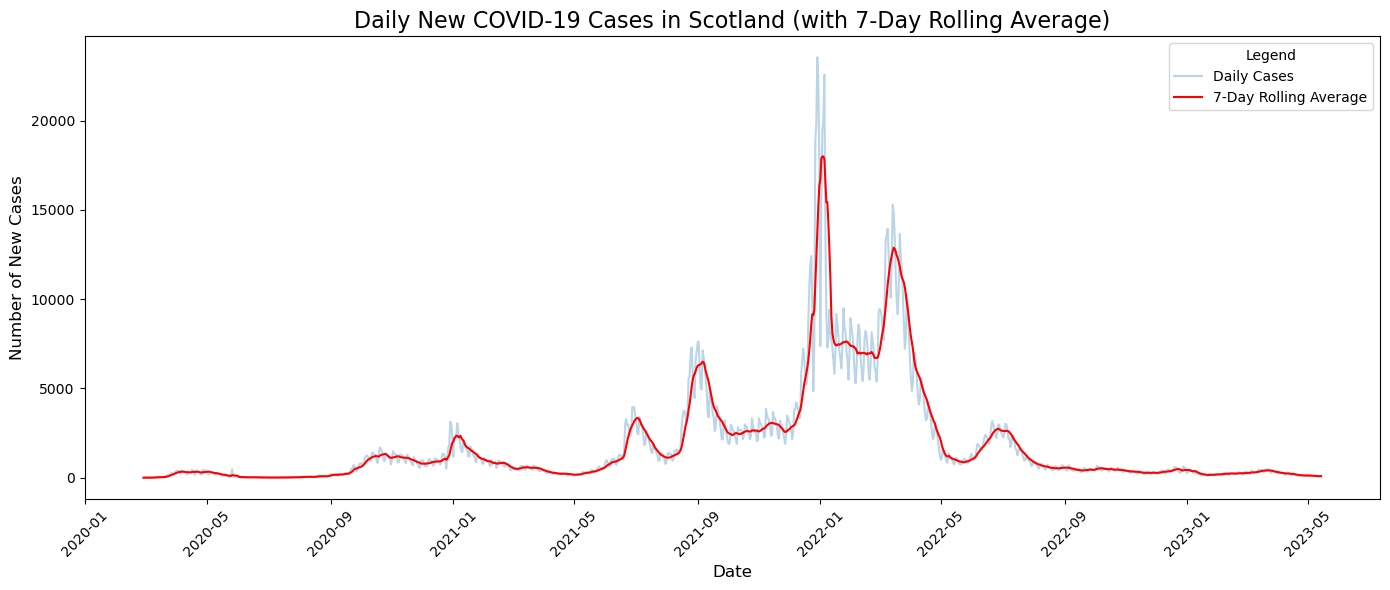

In [7]:
# Calculate the 7-day rolling average using the defined function
daily_cases_df['7day_avg'] = calculate_rolling_avg(daily_cases_df, 'New Cases', window=7, min_periods=1)

# Plot daily cases and 7-day average
plt.figure(figsize=(14, 6))

# Plot the daily cases
sns.lineplot(data=daily_cases_df, x='Date', y='New Cases', label='Daily Cases', alpha=0.3)

# Plot the 7-day rolling average
sns.lineplot(data=daily_cases_df, x='Date', y='7day_avg', label='7-Day Rolling Average', color='red')

# Use the custom function to handle plot customization
customize_plot('Daily New COVID-19 Cases in Scotland (with 7-Day Rolling Average)', 'Date', 'Number of New Cases')

# Add legend
plt.legend(title='Legend')

# Show the plot
plt.show()

COVID cases were multimodal, with the most intense peak in January of 2022, with over 20000 new cases reported in one day, and another significant peak in April of 2022, with around 15000 cases in a single day. 

The timing of these peaks is fascinating in terms of its placement in the pandemic overall as well as the correlations to national holidays. Significant increases in infections in January and April suggest that there were high levels of spread in the weeks prior, which would have been Christmas 2021 and Spring Break (for many university and school students) in early April of 2022. 

In addition, the number of cases in early 2022 is surprising given that vaccines started to be distributed in mass in the end of 2020\-\-this suggests that the emergence of vaccines may have caused increase confidence, where people were less careful about avoiding infection, when they and/or those around them were vaccinated. 



After evaluating how COVID cases shifted over time, we will now move on to question 2, regarding the vaccination status of people in Scotland throughout the pandemic.

In [8]:
# Access the 'Vaccinations by Sex and Age' sheet from the all_sheets dictionary. We will use it to create a new dataFrame called df_dose1_total which we cna use to connect our analysis, focusing on total vaccinations, but narrowed to the first dose and individuals 12+. 

df_vax_demo = all_sheets.get('Vaccinations by Sex and Age')

# Check if the sheet is loaded correctly
if df_vax_demo is None:
    raise ValueError("The 'Vaccinations by Sex and Age' sheet is not found in the dataset.")

# Ensure required columns are present
required_columns = ['Date', 'Dose', 'AgeGroup', 'CumulativeNumberVaccinated']
if not all(col in df_vax_demo.columns for col in required_columns):
    raise ValueError(f"Missing required columns: {set(required_columns) - set(df_vax_demo.columns)}")

# Convert 'Date' to datetime with error handling
df_vax_demo['Date'] = pd.to_datetime(df_vax_demo['Date'], errors='coerce', format='%Y%m%d')

# Filter for Dose 1 and the specific age group
df_dose1 = df_vax_demo[(df_vax_demo['Dose'] == 'Dose 1') & (df_vax_demo['AgeGroup'] == '12 years and over')]

# Group by date and sum the CumulativeNumberVaccinated
df_dose1_total = df_dose1.groupby('Date')['CumulativeNumberVaccinated'].sum().reset_index()

# Check result
df_dose1_total.head()

,Date,CumulativeNumberVaccinated
0,2020-12-08,3814
1,2020-12-09,11442
2,2020-12-10,21218
3,2020-12-11,31680
4,2020-12-12,35908


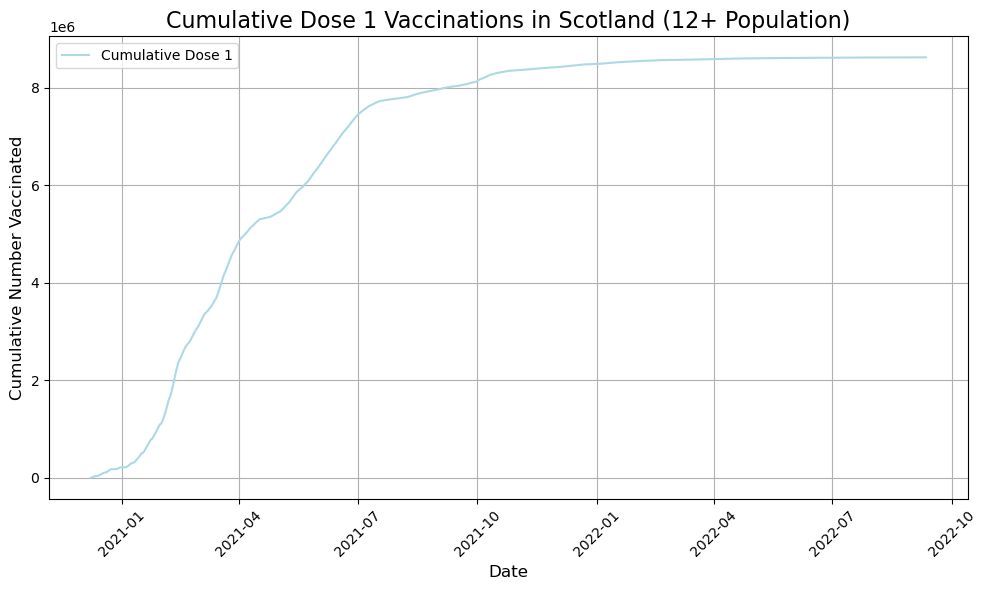

In [9]:
# Plotting the data for Cumulative Dose 1 vaccinations
plt.figure(figsize=(10, 6))
plt.plot(df_dose1_total['Date'], df_dose1_total['CumulativeNumberVaccinated'], label='Cumulative Dose 1', color='lightblue')

# Use the custom function to handle plot customization
customize_plot('Cumulative Dose 1 Vaccinations in Scotland (12+ Population)', 'Date', 'Cumulative Number Vaccinated')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

By looking at cumulative Dose 1 (first) vaccinations in Scotland among those ages 12+, we can see that most vaccinations occured wtihin the first 9 months of its availability, and afterthat there was a steep drop-off.  Most likely, those who wanted to be vaccinated already had been, and we have decided not to include additional vaccinations (Boosters) in this data. 

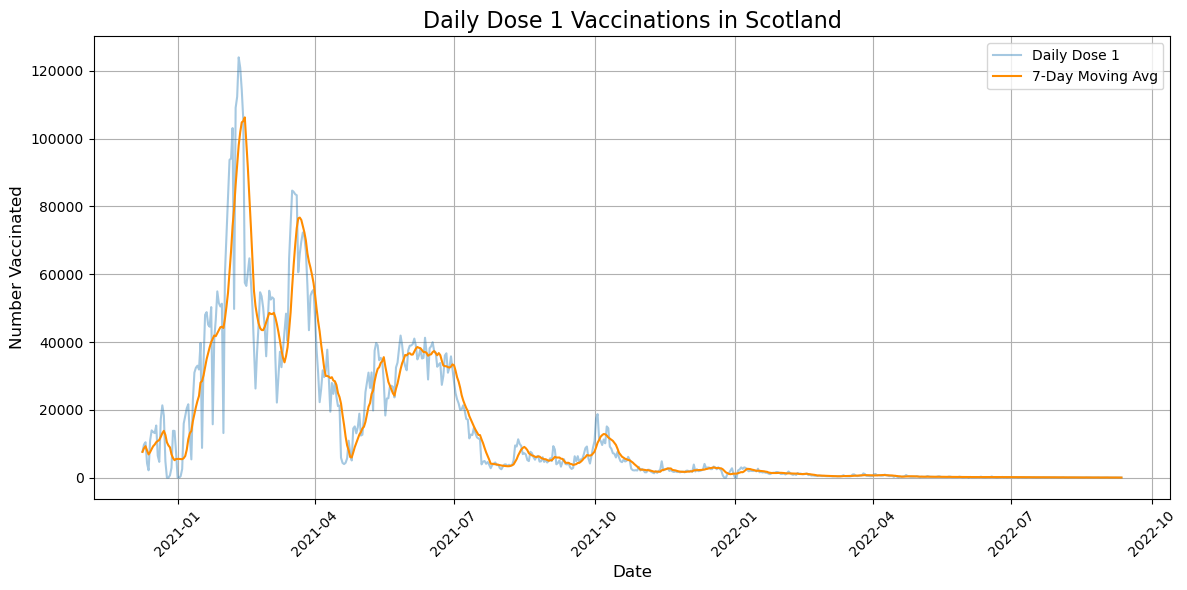

In [10]:
# Ensure data is sorted by date before calculating diff/rolling
df_dose1_total = df_dose1_total.sort_values('Date').reset_index(drop=True)

# Calculate daily vaccinations (first difference of cumulative)
df_dose1_total['DailyVaccinations'] = df_dose1_total['CumulativeNumberVaccinated'].diff()

# Calculate 7-day rolling average using the previously defined function
df_dose1_total['7DayAvg'] = calculate_rolling_avg(df_dose1_total, 'DailyVaccinations', window=7, min_periods=1)

# Plot
plt.figure(figsize=(12, 6))

# Plot daily vaccinations and 7-day moving average
plt.plot(df_dose1_total['Date'], df_dose1_total['DailyVaccinations'], alpha=0.4, label='Daily Dose 1')
plt.plot(df_dose1_total['Date'], df_dose1_total['7DayAvg'], color='darkorange', label='7-Day Moving Avg')

# Use the custom function to handle plot customization
customize_plot('Daily Dose 1 Vaccinations in Scotland', 'Date', 'Number Vaccinated')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

The initial spike in vaccinations was in late February of 2021, which likely correlates to their widespread availability to the general public in Scotland. Following the initial peak, there was another peak in vaccinations in late March\-\-likely corresponding to the approaching Spring Holiday\-\-and another as students prepared for Summer Holiday in June. Vaccination rates sharply declined after November of 2021, most likely because those who wanted to be vaccinated had already done so. 


In [11]:
vax_summary = df_dose1_total['DailyVaccinations'].agg(['mean', 'median', 'max', 'min', 'sum']).to_frame().T

vax_summary_styled = (
    vax_summary
    .style
    .format({
        'mean': "{:.1f}",
        'median': "{:.1f}",
        'max': "{:.0f}",
        'min': "{:.0f}",
        'sum': "{:.0f}"
    })
    .background_gradient(cmap='BuGn')  # Blue to turquoise/greenish gradient
)

vax_summary_styled

,mean,median,max,min,sum
DailyVaccinations,13424.7,2846.0,123940,0,8618646


On average, 13,000 people were vaccinated every day! At the peak, 123,940 Scots were jabbed in just 24 hours. 

The next section will evaluate the correlation between vaccination and death rates during the COVID\-19 pandemic, in response to Exam Question 3.



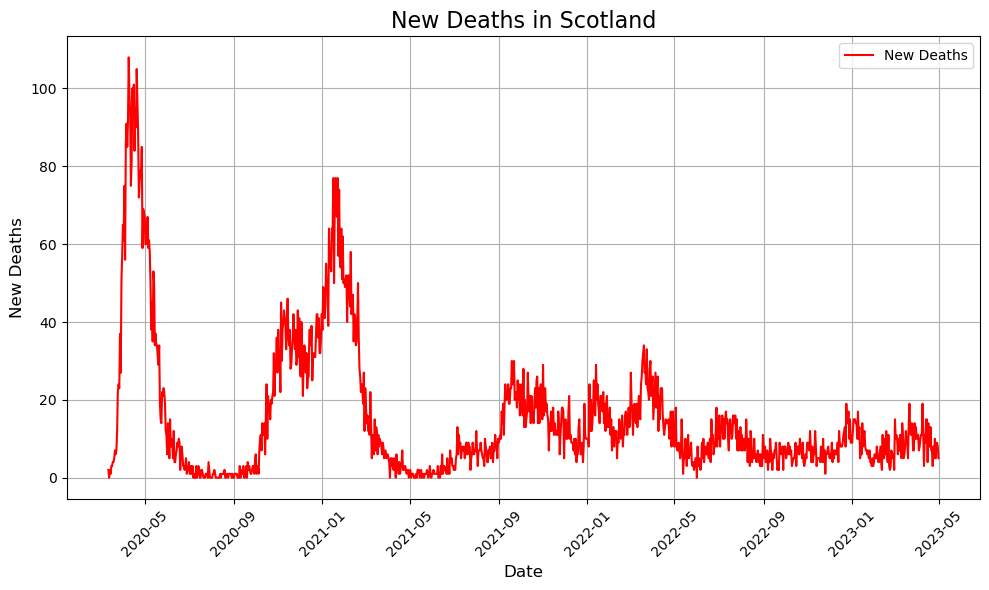

In [12]:
# Create df_deaths directly from the all_sheets dictionary
df_deaths = all_sheets['New Deaths by Day'].copy()

# Convert 'Date' column to datetime
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'])

# Aggregate death data by date
df_deaths_total = df_deaths.groupby('Date')['New Deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_deaths_total['Date'], df_deaths_total['New Deaths'], label='New Deaths', color='red')

# Use the custom function to handle plot customization
customize_plot('New Deaths in Scotland', 'Date', 'New Deaths')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Deaths from COVID in Scotland peaked in April of 2020, likely because little was known about the disease, its severity, or how to treat it. There was another peak in January of 2021, which would have been shortly after the holiday season of December 2020 when many would be traveling to visit their families and there would have been increased spread. After April of 2021, there was a significant tapering of deaths from COVID-19. 

In [13]:
# Select and clean relevant columns from vaccination data
daily_vaccinations_table = (
    df_dose1_total[['Date', 'DailyVaccinations']]
    .dropna(subset=['DailyVaccinations'])
)

# Merge with deaths data (use df_deaths_total for aggregated values)
merged_df = pd.merge(
    df_deaths_total,  # already grouped by date
    daily_vaccinations_table,
    on='Date',
    how='left'
)

# Fill missing vaccination values with 0
merged_df['DailyVaccinations'] = merged_df['DailyVaccinations'].fillna(0).astype(float)

# Filter by date range
filtered_df = merged_df[
    (merged_df['Date'] >= '2020-12-09') & 
    (merged_df['Date'] <= '2020-12-13')
]

# Display result
print(filtered_df)

          Date  New Deaths  DailyVaccinations
272 2020-12-09          27             7628.0
273 2020-12-10          32             9776.0
274 2020-12-11          23            10462.0
275 2020-12-12          26             4228.0
276 2020-12-13          26             2188.0


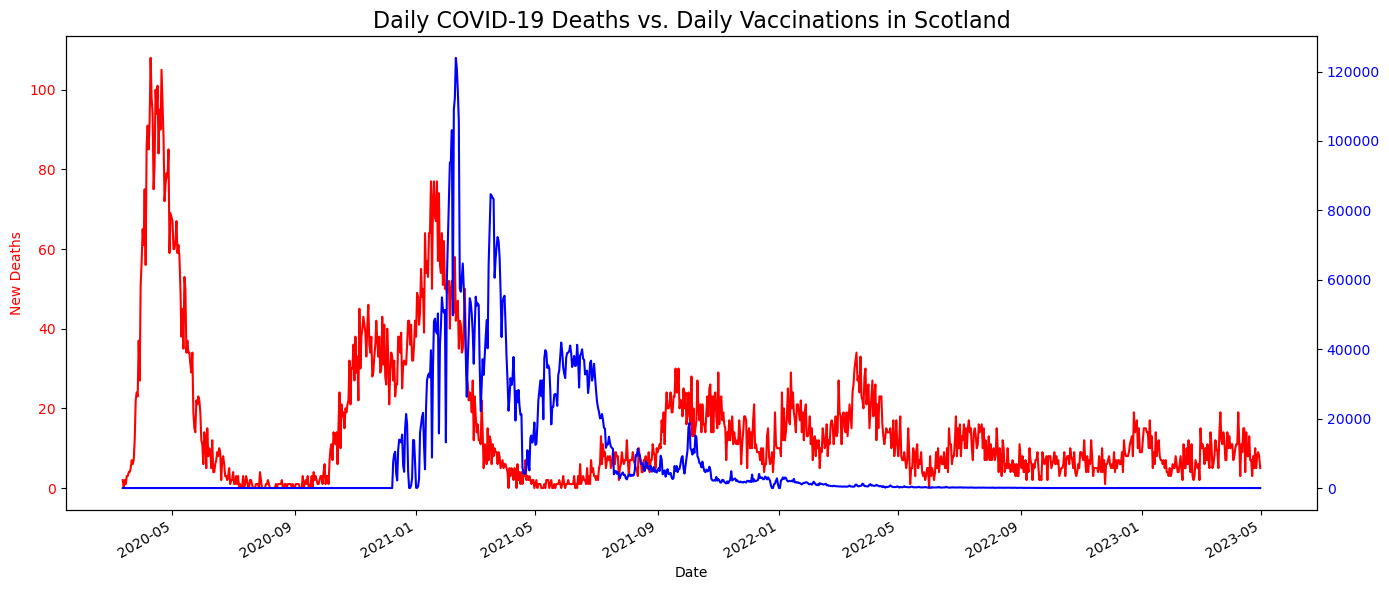

In [14]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot new deaths on left y-axis
ax1.plot(merged_df['Date'], merged_df['New Deaths'], color='red', label='New Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Deaths', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Plot daily vaccinations on right y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['DailyVaccinations'], color='blue', label='Daily Vaccinations')
ax2.set_ylabel('Daily Vaccinations', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Use the custom function to handle plot customization for shared title and x-axis labels
customize_plot('Daily COVID-19 Deaths vs. Daily Vaccinations in Scotland', 'Date', '')

# Title and layout adjustments
fig.autofmt_xdate()
plt.tight_layout()

# Show the plot
plt.show()

When we evaluate deaths in comparison to daily vaccinations, most deaths occurred before the availability of the vaccine. As soon as vaccines were released in December of 2020, deaths experienced a signficiant drop off, but with a delay of about 4 months. After September of 2021, both deaths and vaccinations were much lower and more stable. 

In [15]:
# Calculate Pearson correlation
correlation = merged_df[['DailyVaccinations', 'New Deaths']].corr(method='pearson').round(2)

# Style and display
styled_corr = correlation.style.background_gradient(cmap='coolwarm').format("{:.2f}")
display(styled_corr)

,DailyVaccinations,New Deaths
DailyVaccinations,1.00,0.14
New Deaths,0.14,1.00


At first glance the correlation between vaccinations and deaths is not waht we would expect--vaccinations are correlated with more deaths. However, when we account for a lag in the impact of vaccinations on deaths, the correlation shifts significantly. 

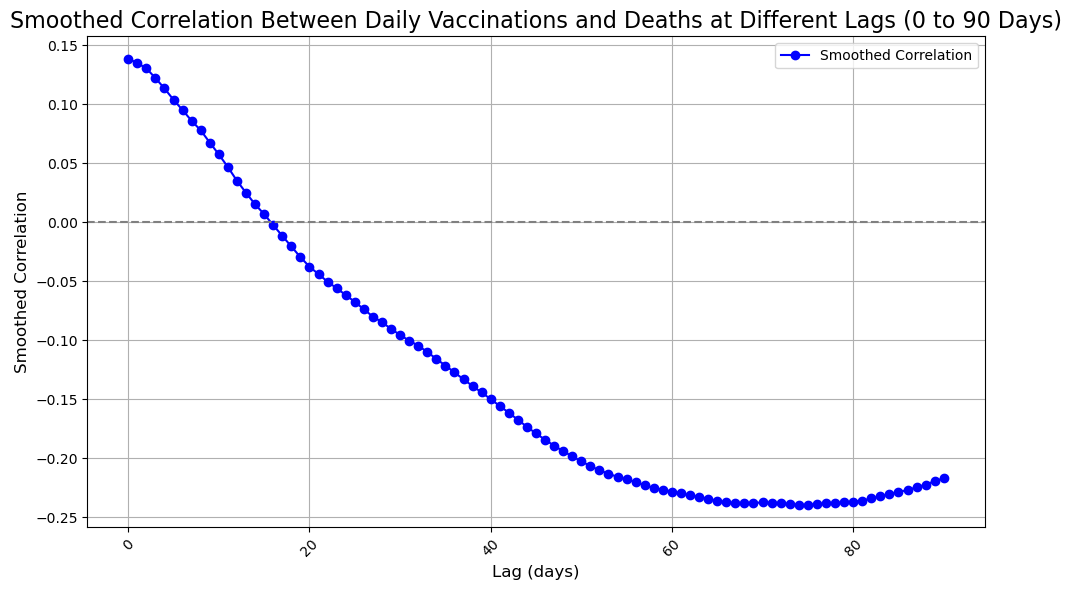

In [16]:
import numpy as np

# Predefine series to avoid repeated lookup
deaths = merged_df['New Deaths']
vaccinations = merged_df['DailyVaccinations']

# Compute correlations with different lags up to 90 days
lags = range(91)  # Lags from 0 to 90
correlations = [deaths.corr(vaccinations.shift(lag)) for lag in lags]

# Apply rolling mean (smooth the correlation values)
window_size = 3  # Adjust for more or less smoothing
smoothed_correlations = pd.Series(correlations).rolling(window=window_size, min_periods=1).mean()

# Plot the smoothed correlation results
plt.figure(figsize=(10, 6))
plt.plot(lags, smoothed_correlations, marker='o', color='b', label='Smoothed Correlation')

# Use the custom function for plot customization
customize_plot('Smoothed Correlation Between Daily Vaccinations and Deaths at Different Lags (0 to 90 Days)', 'Lag (days)', 'Smoothed Correlation')

# Add horizontal line at 0 for reference
plt.axhline(0, color='gray', linestyle='--')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Another interesting thing to note is the lag in correlation between vaccinations and deaths from COVID-19. At first, there is almost no correlation between vaccines and deaths, but after about 2 weeks, the correlation shifts to being negative and continues to strengthen. Essentially, the vaccinations were effective in decreasiang deaths, but with a lag. 2 weeks, 3 weeks, or 3 months after vaccinations are delivered in bulk, deaths decrease significanty. 

This is in alignment with our findings in the death trends earlier, where the significant drop in deaths from COVID-19 took place about 3-4 months after the vaccines became available and widely used. 

Scientifically, the reasoning for this is that vaccinations don't help people who are currently infected or sick, they prevent future infections. 

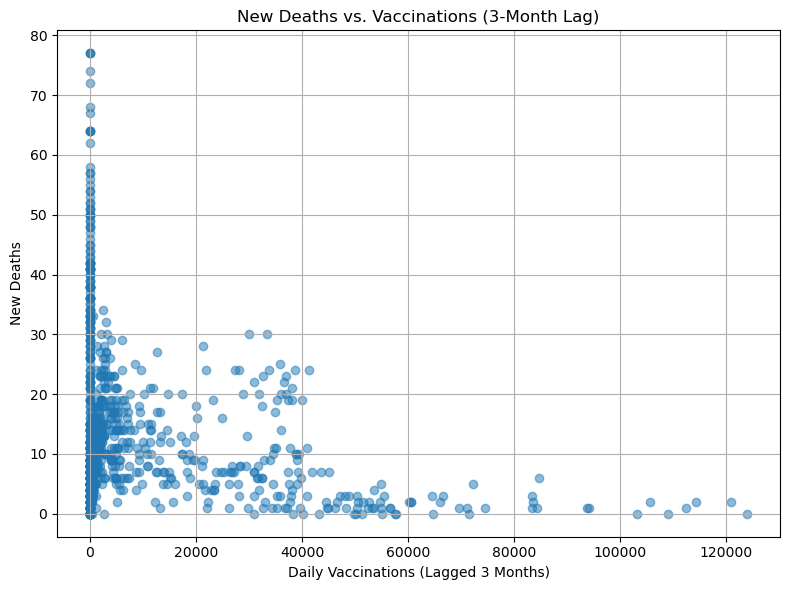

In [17]:
# Shift vaccination data forward to simulate a lag
merged_df['LaggedVaccinations'] = merged_df['DailyVaccinations'].shift(90)

# Drop rows with NaN values resulting from the lag
lagged_deaths_df = merged_df.dropna(subset=['LaggedVaccinations', 'New Deaths'])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(lagged_deaths_df['LaggedVaccinations'], lagged_deaths_df['New Deaths'], alpha=0.5)
plt.title('New Deaths vs. Vaccinations (3-Month Lag)')
plt.xlabel('Daily Vaccinations (Lagged 3 Months)')
plt.ylabel('New Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

After answering the core questions of the exam, related to cases, vaccinations, and deaths due to COVID-19 in Scotland, we will disaggregate the data further to uncover additional insights. 

Key questions we will explore here are:

1) What were the gendered responses to COVID-19 in Scotland, in terms of vaccination?
2) What was the regional distribution of COVID-19 in Scotland?

While we were initially also interested in data that was further disaggregated by gender or race/ethnicity, finding datasets with large enough samples to be statistically significant proved difficult, so analysis is focused on questions that can be confidently answered with the existing data. 

We will begin by exploring the correlations between gender(sex) and vaccination.

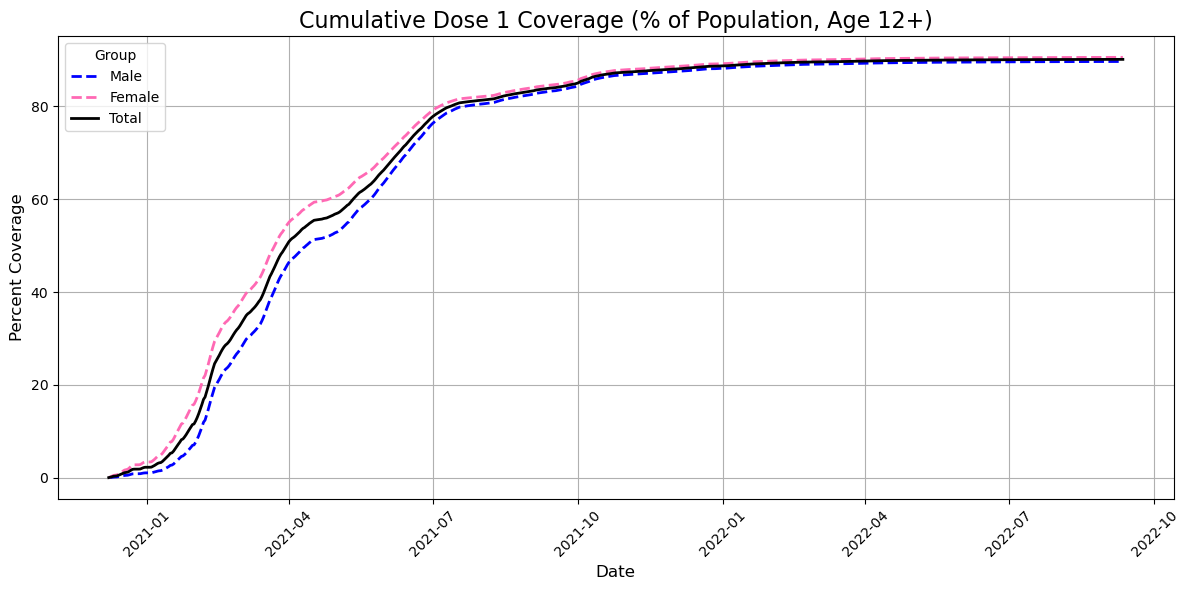

In [18]:
# Group by Date and Sex
df_sex = df_dose1.groupby(['Date', 'Sex'])[['CumulativeNumberVaccinated', 'Population']].sum().reset_index()

# Pivot data for plotting
df_pivot = df_sex.pivot(index='Date', columns='Sex', values=['CumulativeNumberVaccinated', 'Population'])

# Calculate % coverage for Male, Female, and Total (all combined)
pct_male = (df_pivot['CumulativeNumberVaccinated']['Male'] / df_pivot['Population']['Male']) * 100
pct_female = (df_pivot['CumulativeNumberVaccinated']['Female'] / df_pivot['Population']['Female']) * 100

# Compute total % coverage (for the whole population, regardless of gender)
total_vaccinated = df_dose1.groupby('Date')['CumulativeNumberVaccinated'].sum()
total_population = df_dose1.groupby('Date')['Population'].sum()
pct_total = (total_vaccinated / total_population) * 100

# Plot % coverage
plt.figure(figsize=(12, 6))

# Use the matching colors: pink for Female, blue for Male, and light green for Total
plt.plot(pct_male.index, pct_male, label='Male', linestyle='--', linewidth=2, color='blue')
plt.plot(pct_female.index, pct_female, label='Female', linestyle='--', linewidth=2, color='hotpink')
plt.plot(pct_total.index, pct_total, label='Total', linewidth=2, color='black')

# Use the custom function for plot customization
customize_plot('Cumulative Dose 1 Coverage (% of Population, Age 12+)', 'Date', 'Percent Coverage')

# Add the legend and grid
plt.legend(title='Group')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Filter out rows where 'Sex' is missing or 'Unknown'
valid_sex_df = df_sex[df_sex['Sex'].isin(['Female', 'Male'])]

# Group by 'Sex' and take the latest value for 'CumulativeNumberVaccinated' for each gender
latest_vax_by_gender = valid_sex_df.groupby('Sex').last()['CumulativeNumberVaccinated']

# Recalculate the total number of vaccinations (all genders combined, using only the latest value for each gender)
total_vax_all = latest_vax_by_gender.sum()

# Recalculate the proportion of total vaccinations by gender (percentage of the total of Female + Male)
proportion_vax_by_gender = latest_vax_by_gender / total_vax_all

# Create the summary DataFrame again
gender_vax_summary = pd.DataFrame({
    'Total Vaccinations': latest_vax_by_gender.round(),  # Round absolute numbers
    'Proportion of Total (%)': (proportion_vax_by_gender * 100).round(2)  # Round proportions to 2 decimals
})

# Add the total row at the bottom (total of Female + Male)
gender_vax_summary.loc['Total'] = gender_vax_summary.sum()

# Function to apply color styling to the full DataFrame
def color_map_dataframe(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    
    for row in df.index:
        for col in df.columns:
            if row == 'Total':
                styles.loc[row, col] = 'background-color: lightgreen'
            elif row == 'Female':
                styles.loc[row, col] = 'background-color: pink'
            elif row == 'Male':
                styles.loc[row, col] = 'background-color: lightblue'
    return styles

# Apply formatting and styling
styled_gender_vax_summary = gender_vax_summary.style.format({
    'Total Vaccinations': "{:,.0f}",
    'Proportion of Total (%)': "{:.2f}%"
}).apply(color_map_dataframe, axis=None)

styled_gender_vax_summary

,Total Vaccinations,Proportion of Total (%)
Sex,,
Female,"2,235,554",51.85%
Male,"2,075,676",48.15%
Total,"4,311,230",100.00%


In [20]:
# Total vaccinations by sex
female_vaccinations = 6_632_946
male_vaccinations = 6_153_478

# Calculate the difference and percent difference
difference = female_vaccinations - male_vaccinations
percent_more = (difference / male_vaccinations) * 100

# Print results
print(f"Women received {difference:,} more vaccinations than men.")
print(f"That's approximately {percent_more:.2f}% more than men.")

Women received 479,468 more vaccinations than men.
That's approximately 7.79% more than men.


Throughout the pandemic, women were more likely to be vaccinated than men, by about 7.79%. 

This could be explained in part by the fact that women were more likely than men to be frontline workers, and are particularly overrepresented in the health and social care sectors, where spread of the disease would also have been easier because of close contact. For example, 77% of the NHS Scotland workforce are women, and women accounted for about 78% of healthcare workers across Europe in 2019. This overrepresentation of women in frontline roles also contributed to higher COVID-19 infection rates among women compared to men in certain age groups. There were twice as many COVID-19 infections among female health workers in Scotland than male. Because of women's increased exposure to the virus, the perceived importance of getting vaccinated could have been higher, causing this gender disparity in vaccination rates. 

Source: https://policyscotland.gla.ac.uk/wp-content/uploads/2021/05/PSGCPHCOVIDMicroBrief2Women.pdf

The difference in vaccination rates between genders is an example of why gendered analysis of COVID-19 matters. Studies around the world have been conducted on the gendered impacts of the pandemic, including in terms of economic well-being, educational attainment, mental health, sexual and reproductive health, and more. A more in-depth analysis of data in Scotland could illuminate details further in support of this idea. However, seeing the positive role women played in stopping COVID-19 through widespread adoption of vaccination is already a win for the feminists. 


The final section will analyze cases by geographic region. In addition to considering demographic differences, effective public health interventions involve considering regional variation including through factors like population density, healthcare access, and local policy structures in order to effective allocate interventions. 

By disaggregating data by gender and geography, we are unable to lock deeper insights into how the COVID-19 pandemic impacted our country. In future projects, deeper analysis into additional factors like age and ethnicity--and the intersections between these traits and gender and gegraphy--could unlock further insights. 


In [21]:
# Load the data for daily new cases by region
daily_cases_region = all_sheets['New Cases by Region by Day']

# Directly convert 'Date' column to datetime using the correct format
daily_cases_region['Date'] = pd.to_datetime(daily_cases_region['Date'], format='%Y%m%d')

# Preview the first few rows
print(daily_cases_region.head())

        Date            CAName  CumulativePositive
0 2020-02-28             Angus                   1
1 2020-02-29             Angus                   1
2 2020-03-01  Clackmannanshire                   1
3 2020-03-01             Moray                   1
4 2020-03-01             Angus                   1


/var/folders/qv/6tpv3mvs1rdd3pw99c2q1cj00000gn/T/ipykernel_5638/2603546098.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_cases_region['New Cases'].fillna(daily_cases_region['CumulativePositive'], inplace=True)


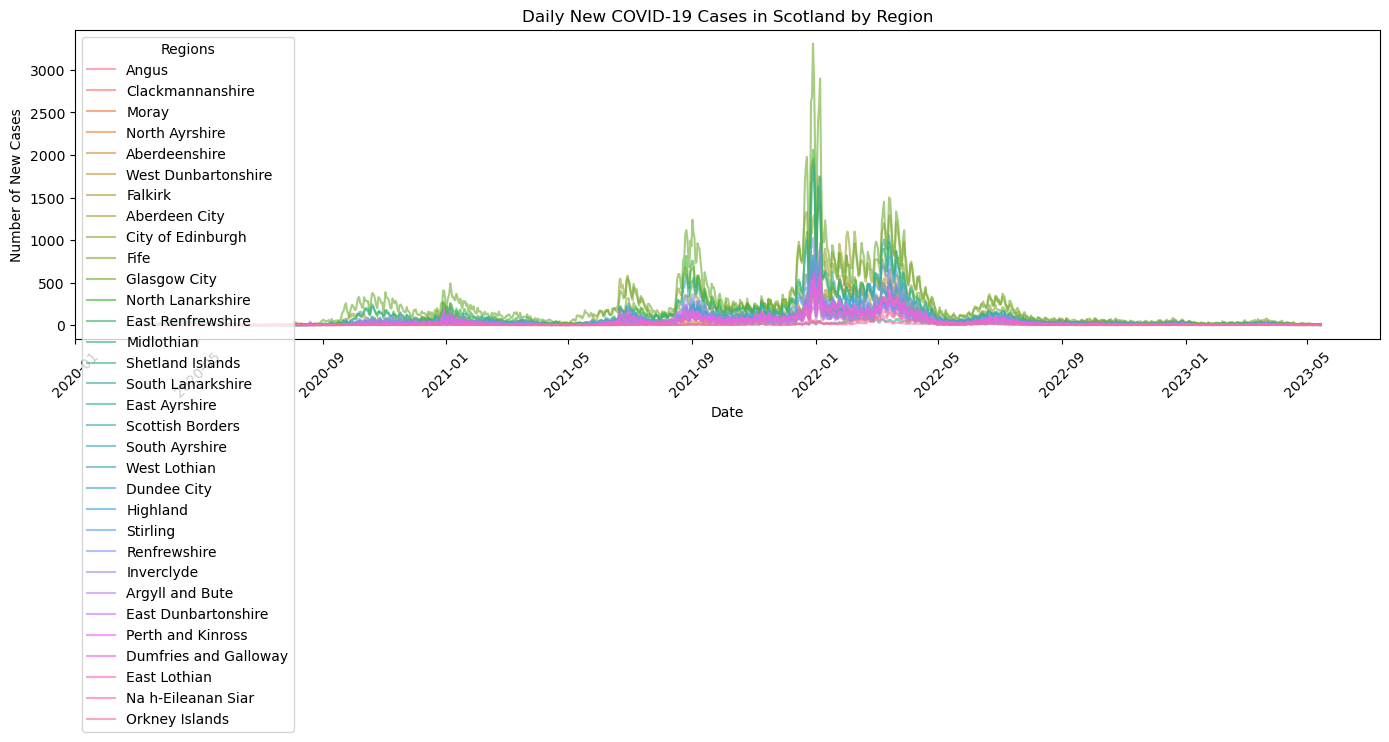

In [22]:
# Calculate daily new cases for each region
daily_cases_region['New Cases'] = daily_cases_region.groupby('CAName')['CumulativePositive'].diff()

# Fill NaN values in 'New Cases' column (for the first row of each region)
daily_cases_region['New Cases'].fillna(daily_cases_region['CumulativePositive'], inplace=True)

# Plotting
plt.figure(figsize=(14,6))

# Plot all regions at once, using 'CAName' as the hue for automatic color coding
sns.lineplot(data=daily_cases_region, x='Date', y='New Cases', hue='CAName', alpha=0.6)

# Customize the plot
plt.title('Daily New COVID-19 Cases in Scotland by Region')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)
plt.legend(title="Regions")
plt.tight_layout()
plt.show()

While looking at the regional distribution of data divided into Council Areas is fascinating, having such a larger number of areas can make it hard to make quick judgments. In the next step, we break down the localities into fewer buckets, in this case the Parliamentary Regions, to see how the number of cases varied across them.

In [23]:
# Define the mapping from CAName to Scottish Parliamentary Region
region_mapping = {
    'Angus': 'North East Scotland',
    'Aberdeenshire': 'North East Scotland',
    'Aberdeen City': 'North East Scotland',
    'Dundee City': 'North East Scotland',

    'Clackmannanshire': 'Mid Scotland and Fife',
    'Falkirk': 'Mid Scotland and Fife',
    'Fife': 'Mid Scotland and Fife',
    'Perth and Kinross': 'Mid Scotland and Fife',
    'Stirling': 'Mid Scotland and Fife',

    'Moray': 'Highlands and Islands',
    'Highland': 'Highlands and Islands',
    'Na h-Eileanan Siar': 'Highlands and Islands',
    'Orkney Islands': 'Highlands and Islands',
    'Shetland Islands': 'Highlands and Islands',
    'Argyll and Bute': 'Highlands and Islands',

    'City of Edinburgh': 'Lothian',
    'East Lothian': 'Lothian',
    'Midlothian': 'Lothian',
    'West Lothian': 'Lothian',

    'Glasgow City': 'Glasgow',

    'North Lanarkshire': 'Central Scotland',
    'South Lanarkshire': 'Central Scotland',
    'East Dunbartonshire': 'Central Scotland',
    'Cumbernauld and Kilsyth': 'Central Scotland',  # not in list but part of region
    'Falkirk East': 'Central Scotland',             # not in list but part of region

    'East Renfrewshire': 'West Scotland',
    'Renfrewshire': 'West Scotland',
    'Inverclyde': 'West Scotland',
    'West Dunbartonshire': 'West Scotland',
    'East Ayrshire': 'West Scotland',
    'North Ayrshire': 'West Scotland',

    'South Ayrshire': 'South Scotland',
    'Scottish Borders': 'South Scotland',
    'Dumfries and Galloway': 'South Scotland',
}

# Map the 'ParliamentaryRegion' column based on the 'CAName' column
daily_cases_region['ParliamentaryRegion'] = daily_cases_region['CAName'].map(region_mapping)

# Handle any regions not found in the mapping by assigning them a default value (e.g., 'Unknown')
daily_cases_region['ParliamentaryRegion'].fillna('Unknown', inplace=True)

# Preview the updated DataFrame
print(daily_cases_region.head())

        Date            CAName  CumulativePositive  New Cases  \
0 2020-02-28             Angus                   1        1.0   
1 2020-02-29             Angus                   1        0.0   
2 2020-03-01  Clackmannanshire                   1        1.0   
3 2020-03-01             Moray                   1        1.0   
4 2020-03-01             Angus                   1        0.0   

     ParliamentaryRegion  
0    North East Scotland  
1    North East Scotland  
2  Mid Scotland and Fife  
3  Highlands and Islands  
4    North East Scotland  


/var/folders/qv/6tpv3mvs1rdd3pw99c2q1cj00000gn/T/ipykernel_5638/874807538.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_cases_region['ParliamentaryRegion'].fillna('Unknown', inplace=True)


In [24]:
# Group by Parliamentary Region and calculate all summary statistics in one go
region_summary_stats = daily_cases_region.groupby('ParliamentaryRegion')['New Cases'].agg(
    mean='mean', 
    median='median', 
    max='max', 
    min='min', 
    sum='sum'
)

# Style the output table for readability (do this only when required for visualization)
styled_summary = region_summary_stats.style.format({
    'mean': "{:.1f}",
    'median': "{:.1f}",
    'max': "{:.0f}",
    'min': "{:.0f}",
    'sum': "{:.0f}"
}).background_gradient(cmap='YlOrRd')

styled_summary

,mean,median,max,min,sum
ParliamentaryRegion,,,,,
Central Scotland,99.2,31.0,2063,0,346299
Glasgow,226.3,105.0,3308,0,263840
Highlands and Islands,23.3,3.0,805,0,161521
Lothian,78.4,22.0,1950,0,364069
Mid Scotland and Fife,55.8,16.0,1434,0,325154
North East Scotland,58.0,16.0,963,0,270992
South Scotland,37.9,12.0,666,0,131736
West Scotland,44.0,15.0,1025,0,307751


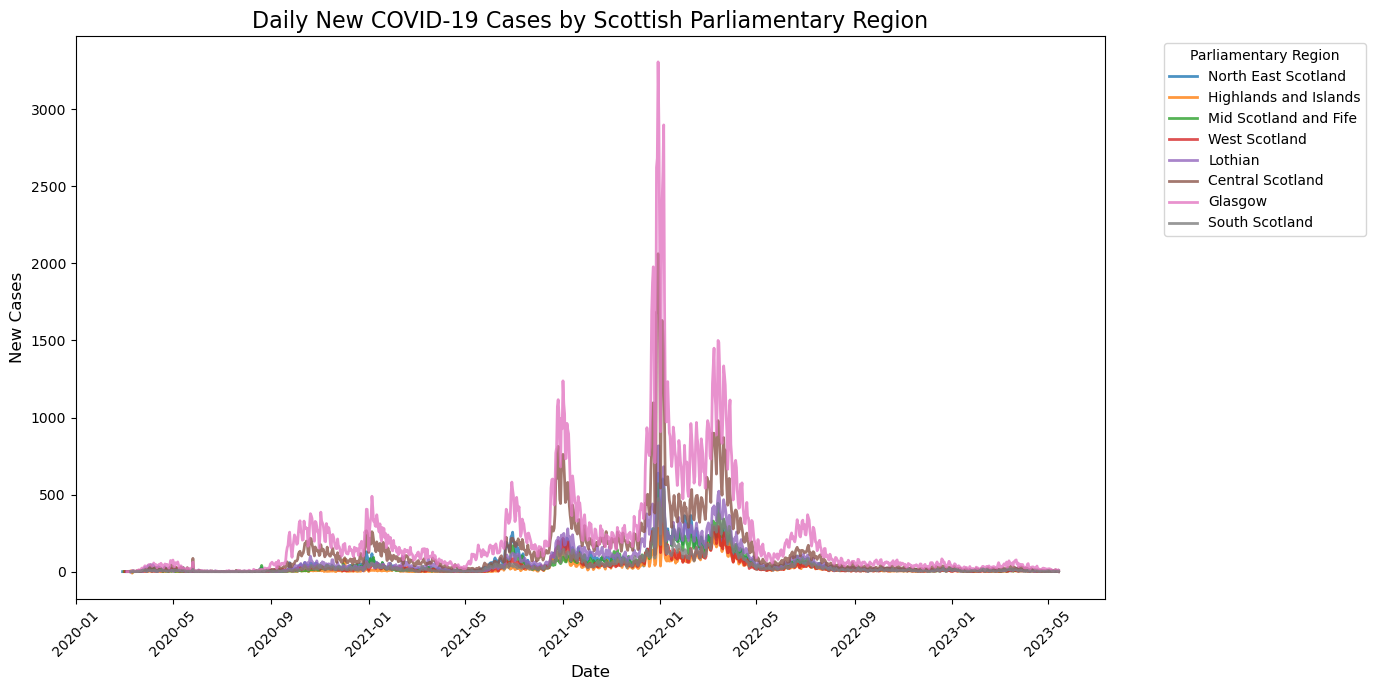

In [25]:
# Step 1: Calculate daily new cases by ParliamentaryRegion (Ensure the data is sorted)
daily_cases_region.sort_values(by=['ParliamentaryRegion', 'Date'], inplace=True)

# Calculate daily new cases per Parliamentary Region
daily_cases_region['New Cases (Region)'] = daily_cases_region.groupby('ParliamentaryRegion')['CumulativePositive'].diff()

# Forward-fill NaN values using ffill method directly
daily_cases_region['New Cases (Region)'] = daily_cases_region.groupby('ParliamentaryRegion')['New Cases (Region)'].ffill()

# Step 2: Aggregate by date and region to get total new cases per day per region
region_daily_totals = daily_cases_region.groupby(['Date', 'ParliamentaryRegion'])['New Cases (Region)'].sum().reset_index()

# Step 3: Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_daily_totals, x='Date', y='New Cases (Region)', hue='ParliamentaryRegion', lw=2, alpha=0.8)

# Use the custom function to handle plot customization
customize_plot('Daily New COVID-19 Cases by Scottish Parliamentary Region', 'Date', 'New Cases')

# Customize the legend
plt.legend(title='Parliamentary Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

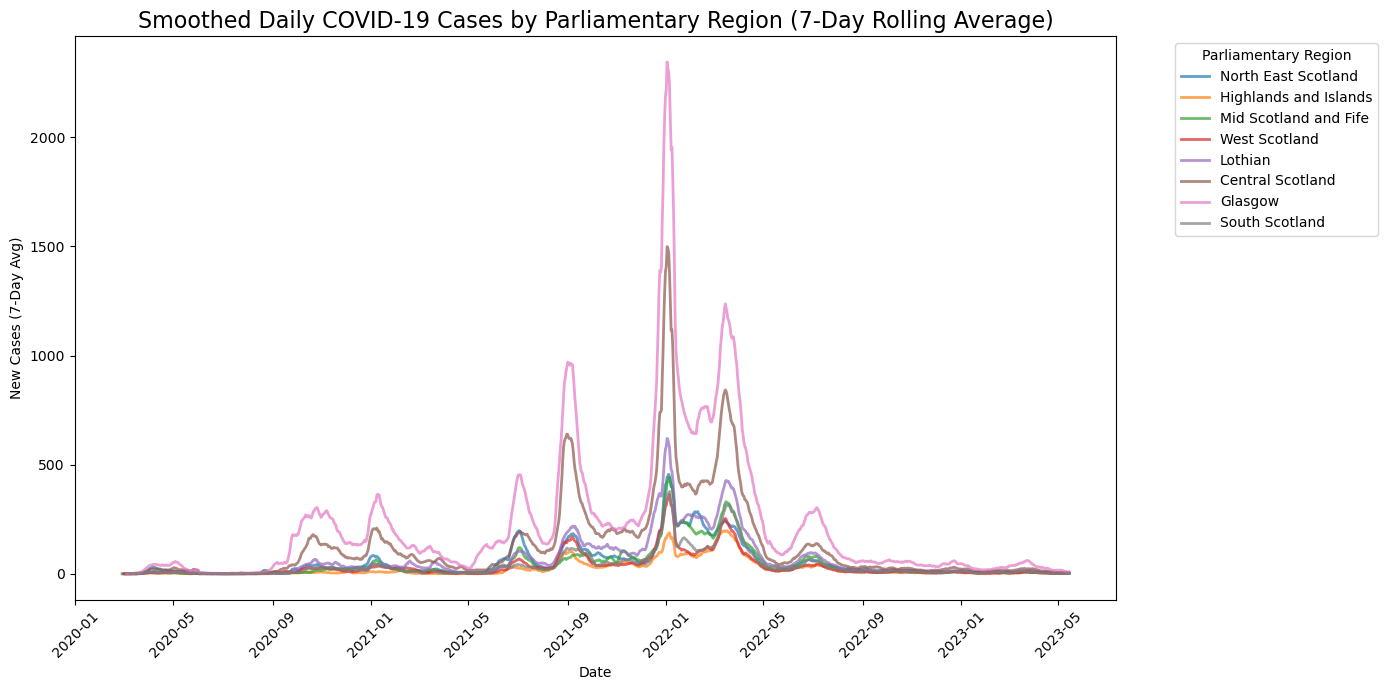

In [26]:
# Calculate a 7-day rolling average for each Parliamentary Region. Not using the pre-defined function this time, because it doesn't look as good, we want different proportions. 

region_daily_totals['Rolling Avg (7d)'] = region_daily_totals.groupby('ParliamentaryRegion')['New Cases (Region)'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_daily_totals, x='Date', y='Rolling Avg (7d)', hue='ParliamentaryRegion', lw=2, alpha=0.7)

# Customize
plt.title('Smoothed Daily COVID-19 Cases by Parliamentary Region (7-Day Rolling Average)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('New Cases (7-Day Avg)')
plt.xticks(rotation=45)
plt.legend(title='Parliamentary Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grouping the COVID cases regionally by Scottish Parliamentary Region allows us to notice disparities over time. We can see that Glasgow had the highest number of cases by far, which could be due to having a higher population. To control this, we will look at cases per 100,000 residents as opposed to absolute numbers. 

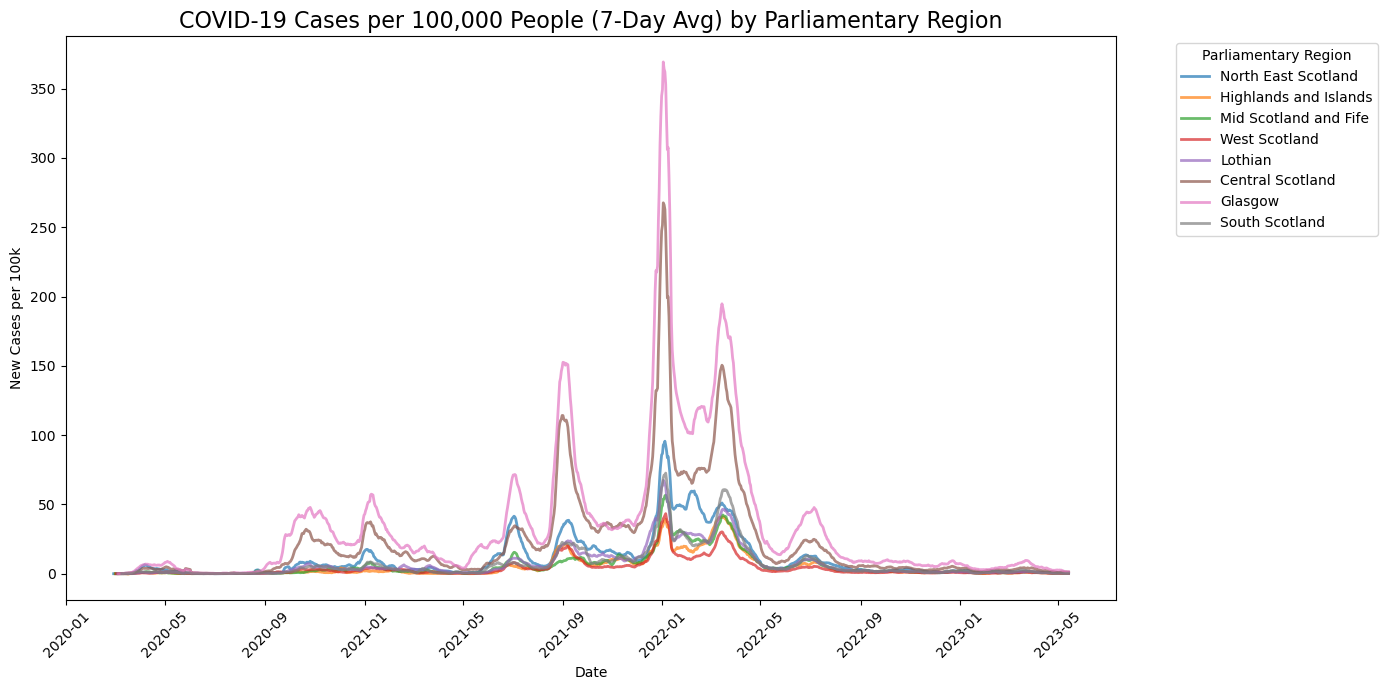

In [27]:
def merge_population_data(df, population_data):
    """
    Merge population data into the given DataFrame based on the 'ParliamentaryRegion' column.
    """
    df['Population'] = df['ParliamentaryRegion'].map(population_data)
    return df

# Step 1: Replace with actual values for each parliamentary region
region_populations = {
    'North East Scotland': 477000,
    'Central Scotland': 560000,
    'Glasgow': 635000,
    'Lothian': 920000,
    'Highlands and Islands': 480000,
    'Mid Scotland and Fife': 780000,
    'South Scotland': 520000,
    'West Scotland': 840000,
}

# Step 2: Merge the population data using the defined function
region_daily_totals = merge_population_data(region_daily_totals, region_populations)

# Step 3: Calculate New Cases per 100k for each region
region_daily_totals['New Cases per 100k'] = (
    region_daily_totals['New Cases (Region)'] / region_daily_totals['Population'] * 100000
)

# Step 4: Calculate 7-day rolling average for New Cases per 100k
region_daily_totals['New Cases per 100k (7d Avg)'] = region_daily_totals.groupby('ParliamentaryRegion')[
    'New Cases per 100k'
].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Step 5: Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_daily_totals, x='Date', y='New Cases per 100k (7d Avg)', hue='ParliamentaryRegion', lw=2, alpha=0.7)

# Customize plot
plt.title('COVID-19 Cases per 100,000 People (7-Day Avg) by Parliamentary Region', fontsize=16)
plt.xlabel('Date')
plt.ylabel('New Cases per 100k')
plt.xticks(rotation=45)
plt.legend(title='Parliamentary Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

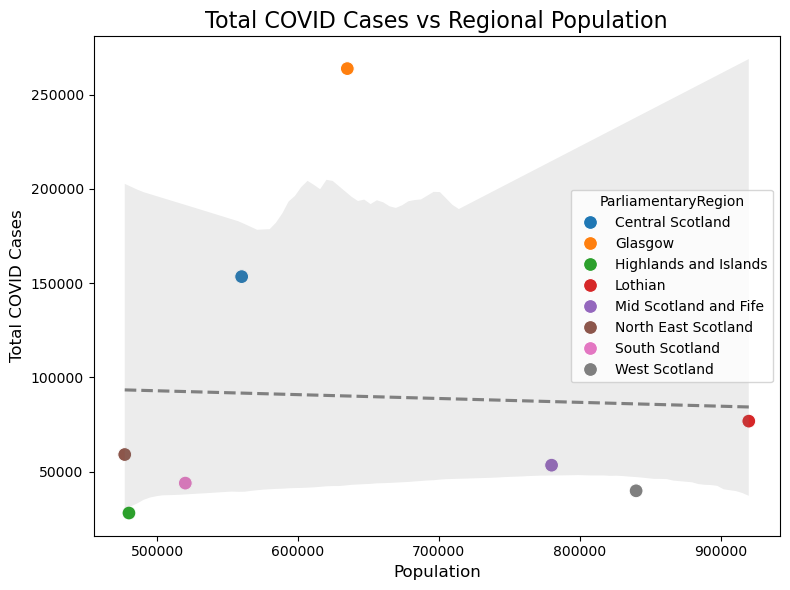

In [28]:
# Sum total cases per region
region_totals = daily_cases_region.groupby('ParliamentaryRegion')['New Cases (Region)'].sum().reset_index()

# Use the defined function to merge population data
region_totals = merge_population_data(region_totals, region_populations)

# Scatter plot with optional regression line
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(data=region_totals, x='Population', y='New Cases (Region)', hue='ParliamentaryRegion', s=100)

# Optional regression line (linear trend)
sns.regplot(data=region_totals, x='Population', y='New Cases (Region)', scatter=False, color='gray', line_kws={'linestyle': '--'})

# Customize plot
plt.title('Total COVID Cases vs Regional Population', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Total COVID Cases', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
# Group by region and calculate summary stats for new cases per 100k
cases_per_100k_stats = region_daily_totals.groupby('ParliamentaryRegion')['New Cases per 100k'].agg(['mean', 'median', 'max', 'min', 'sum'])

# Style the table for readability
styled_cases_per_100k_stats = cases_per_100k_stats.style.format({
    'mean': "{:.2f}",
    'median': "{:.2f}",
    'max': "{:.2f}",
    'min': "{:.2f}",
    'sum': "{:.0f}"
}).background_gradient(cmap='PuBuGn')

# Display styled table
styled_cases_per_100k_stats

,mean,median,max,min,sum
ParliamentaryRegion,,,,,
Central Scotland,23.50,8.93,368.39,0.00,27406
Glasgow,35.63,16.54,520.94,0.00,41549
Highlands and Islands,5.00,1.25,63.96,-2.08,5846
Lothian,7.15,2.72,88.70,-0.54,8349
Mid Scotland and Fife,5.86,1.79,76.28,-0.38,6851
North East Scotland,10.57,3.77,133.96,0.00,12389
South Scotland,7.27,2.69,102.88,0.00,8449
West Scotland,4.06,1.43,62.26,0.00,4743


When we control for population density, we can still see that there were more COVID-19 infections in the more densely-populated regions of Scotland, including Glasgow and Central Scotland. 

This suggests a positive correlation between population density and COVID-19 infections, which makes sense, given that living and working in close quarters with more people would increase your likelihood of catching an illness. 

While the regional breakdown of COVID-19 data isn't particularly fascinating on its own, it could be used in combination with policy frameworks or other demographic data (for example, breakdowns around age, gender, ethnicity/race, socioeconomic level, political leaning, etc.) to draw out additional insights. 